In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
from tqdm import tqdm
import concurrent.futures

print(os.listdir())
import matplotlib.pyplot as plt

['sampling_examples.jpg', 'sampling_examples_facebook.jpg', 'youtube.ipynb', 'shaded.png', 'graph_example450.jpg', 'graph_example400.jpg', 'graph_example350.jpg', 'deezer_ego.ipynb', 'sampling_test.ipynb', 'sampling_examples_fb.jpg', 'graph_example550.jpg', 'graph_example50.jpg', 'Community_example.jpg', 'RMAT.ipynb', 'graph_example300.jpg', 'sampling_examples_fb_large.jpg', 'social_to_adjacency.ipynb', 'graph_example0.jpg', 'graph_example150.jpg', '.ipynb_checkpoints', 'measure_datasets.ipynb', 'sampling_examples_ENGB.jpg', 'graph_example100.jpg', 'twitch.ipynb', 'sampling_examples_git.jpg', 'musae_facebook_edges.csv', 'Figures', 'social_to_ds.ipynb', 'large_twitch_edges.csv', 'graph_example200.jpg', 'cleaner_algorithm.ipynb', 'graph_example250.jpg', 'generate_figures.ipynb', 'nb_class_assignment.ipynb', 'graph_example500.jpg', '.DS_Store', 'artist_edges.csv']


In [2]:
parent_directory = os.path.dirname(os.getcwd())
data_directory   = os.path.join(parent_directory, "raw_datasets/twitch/ENGB/")

In [3]:
filename = "musae_ENGB_edges.csv"
dataset_path = os.path.join(data_directory, filename)

social_data = pd.read_csv(dataset_path, delimiter = ",", skiprows = 0)
print(social_data.shape)
# np.savetxt(r'social_A.txt', social_data.values, fmt='%d', delimiter=",\t")
social_data.head()

(35324, 2)


,from,to
0,6194,255
1,6194,980
2,6194,2992
3,6194,2507
4,6194,986


In [4]:
target_filename = "musae_ENGB_target.csv"
target_path     = os.path.join(data_directory, target_filename)

target_data = pd.read_csv(target_path, delimiter = ",", skiprows = 0)
target_data.head()

node_ids = target_data["id"].tolist()
page_types = target_data["mature"].tolist()


classes = np.unique(page_types)
int_labels = [i for i in range(classes.shape[0])]

conv_dict = {}
for i, page_type in enumerate(list(classes)):
    conv_dict[page_type] = int_labels[i]
    
print(conv_dict)

int_labels = {}

for i, item in enumerate(page_types):
    int_labels[str(i)] = conv_dict[item]

{False: 0, True: 1}


In [5]:
import json

attribute_filename = "musae_ENGB_features.json"
attribute_path     = os.path.join(data_directory, attribute_filename)

with open(attribute_path, "r") as f:
    attribute_data = json.load(f)
    
attribute_shape = len(attribute_data["15"])

keys = list(attribute_data.keys())
lengths = [len(attribute_data[l]) for l in keys]
tokens = []
for k in keys:
    tokens += attribute_data[k]
print(np.unique(lengths))
print(np.min(tokens))
print(np.max(tokens))

def feature_to_token(feature, min_t = 0, max_t = 4800):
    out_vector = np.zeros(max_t)
    out_vector[feature] = 1
    return out_vector

[  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26
  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44
  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  68  69  70  71  73  74  75  80  85  91 152 155]
0
3169


/home/alex/anaconda3/envs/gui_dev/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(7126, 4800)
UMAP(n_components=20, n_jobs=6, n_neighbors=100, verbose=1)
Fri Aug 19 11:24:21 2022 Construct fuzzy simplicial set
Fri Aug 19 11:24:21 2022 Finding Nearest Neighbors
Fri Aug 19 11:24:21 2022 Building RP forest with 9 trees


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Fri Aug 19 11:24:21 2022 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	Stopping threshold met -- exiting after 4 iterations
Fri Aug 19 11:24:36 2022 Finished Nearest Neighbor Search
Fri Aug 19 11:24:38 2022 Construct embedding


Epochs completed: 100%| ████████████████████████████████████████ 500/500 [00:09]


Fri Aug 19 11:24:48 2022 Finished embedding


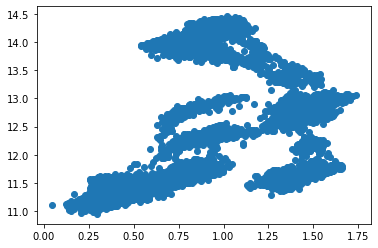

In [6]:
from umap import UMAP
embedder = UMAP(n_components = 20, n_neighbors = 100, n_jobs = 6, verbose = 1)

X = np.array([feature_to_token(attribute_data[k]) for k in keys])
print(X.shape)

features = embedder.fit_transform(X)

plt.scatter(features[:,0], features[:,1])
plt.show()

In [7]:
columns = list(social_data.columns)
print(columns)

G = nx.from_pandas_edgelist(social_data, columns[0], columns[1], create_using = nx.Graph)

for i, node in enumerate(list(G.nodes)):
    
    G.nodes[node]["target"] = int_labels[str(node)]
    G.nodes[node]["attribute"] = features[i,:]
    # print(features[i,:])

['from', 'to']


In [8]:
G = nx.convert_node_labels_to_integers(G)

(35324, 2)
7126
2000
400000


  0%|                                                   | 0/200 [00:00<?, ?it/s]

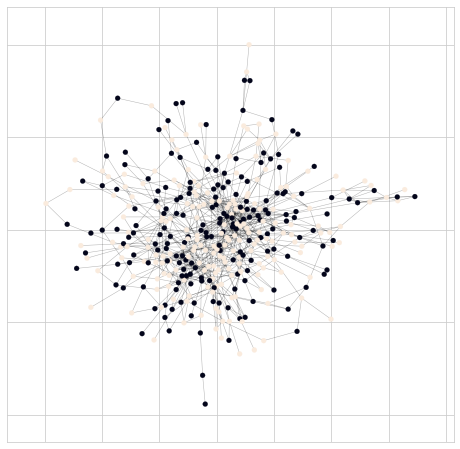

 24%|██████████▎                               | 49/200 [00:01<00:02, 63.81it/s]

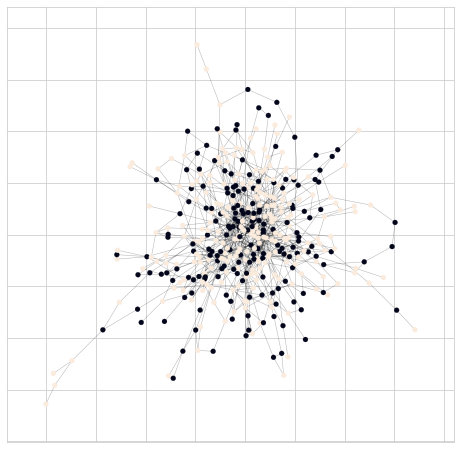

 48%|████████████████████▏                     | 96/200 [00:02<00:01, 56.51it/s]

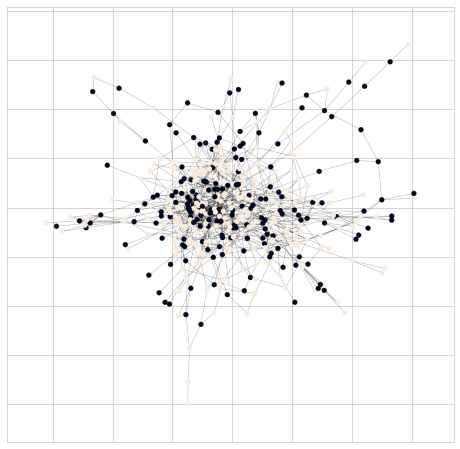

 74%|██████████████████████████████▌          | 149/200 [00:03<00:00, 55.53it/s]

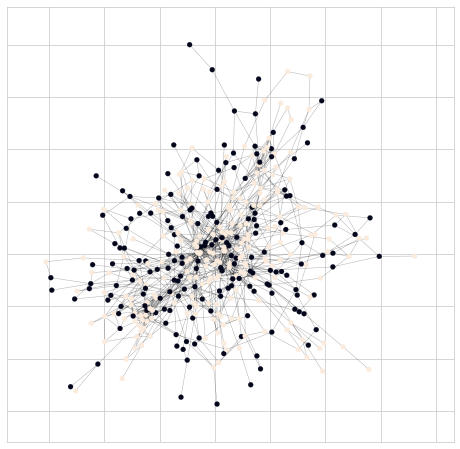

100%|█████████████████████████████████████████| 200/200 [00:05<00:00, 39.71it/s]

(171329, 2)
(78777,)


In [9]:
from littleballoffur import ForestFireSampler, MetropolisHastingsRandomWalkSampler, RandomWalkSampler, DiffusionSampler
print(social_data.shape)
n_nodes = np.unique(social_data.values).shape[0]
print(n_nodes)
n_graphs = 200

graph_ind_array = np.zeros(n_nodes)
min_per_graph = 20
n_per_graph = 2000#int(n_nodes / n_graphs)

print(n_per_graph)

total_n = n_per_graph * n_graphs



print(total_n)
graph_ind_array = np.zeros(total_n)

graphlist = []
#number_of_nodes = int(0.5*graph.number_of_nodes())

offset_index = 0
for i in tqdm(range(n_graphs)):
    
    # new_graph = G
    n_nodes = 0
    
    while n_nodes == 0:
        n_nodes_attempt = np.random.normal(400., 50.)
        if n_nodes_attempt <= 2000 and n_nodes_attempt >= 20:
            n_nodes = n_nodes_attempt
    sampler = MetropolisHastingsRandomWalkSampler(number_of_nodes = n_nodes,# np.random.randint(min_per_graph, n_per_graph), #n_per_graph,#
                               seed = np.random.randint(1, 1e9))
    new_graph = sampler.sample(G)
    
    # print(len(list(new_graph.nodes())))
    
    new_graph = nx.convert_node_labels_to_integers(new_graph, first_label=offset_index)
    
    graph_ind_array[offset_index:(i+1) * n_per_graph] = i+1
    
    nodes = list(new_graph.nodes())
    
    node_labels_g = [new_graph.nodes[n]["target"] for n in new_graph.nodes]
    node_attrs_g = [new_graph.nodes[n]["attribute"] for n in new_graph.nodes]
    
    graphlist.append(new_graph)
    
    
    if i ==0:
        graph_adj = np.array(new_graph.edges())
        graph_ind_array = np.array(np.full(len(nodes), i+1))
        node_labels = np.array(node_labels_g)
        node_attrs = np.array(node_attrs_g)
        
    else:
        graph_adj = np.append(graph_adj, np.array(new_graph.edges()), axis = 0)
        graph_ind_array = np.append(graph_ind_array, np.array(np.full(len(nodes), i+1)))
        node_labels = np.append(node_labels, node_labels_g)
        node_attrs = np.append(node_attrs, node_attrs_g, axis = 0)
    
    if i % 50 == 0:
        # print(node_attrs.shape)
        # print(node_attrs.shape[0]/n_per_graph)
        
        plt.figure(figsize = (8,8))
        
        pos = nx.spring_layout(
          new_graph, k=0.1, iterations=100)
        
        
        colors = []
        
        for g in new_graph.nodes:
            try:
                colors.append(new_graph.nodes[g]["target"])
            except:
                colors.append(-1)
        
        nx.draw_networkx_nodes(
          new_graph,
          pos,
          node_size=25,
          node_color=colors,
          alpha=1,
          linewidths=0.2)#,
          # font_size=1.5)
        nx.draw_networkx_edges(new_graph, pos, alpha=0.3, width=0.5)

        plt.savefig(f"Figures/graph_example{i}.jpg")
        plt.show()
    offset_index += len(nodes)

print(graph_adj.shape)
print(graph_ind_array.shape)

total_n = graph_ind_array.shape[0]

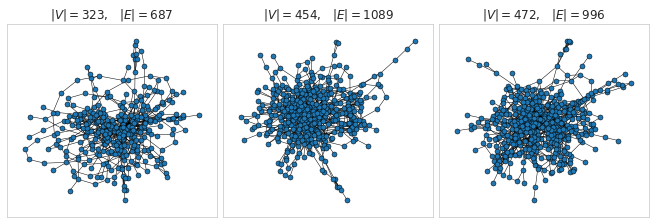

In [10]:
fig, axes = plt.subplots(ncols = 3, figsize = (9,3), constrained_layout = True)

for i, g in enumerate(graphlist[97:100]):
    new_graph = g
    pos = nx.spring_layout(
      new_graph, k=0.1, iterations=150)


    colors = []

    for g in new_graph.nodes:
        try:
            colors.append(new_graph.nodes[g]["target"])
        except:
            colors.append(-1)
            
    axes[i].set_title(r"$|V| = {{{}}}$,   $|E|={{{}}}$".format(len(colors), nx.number_of_edges(new_graph)))

    nx.draw_networkx_nodes(
      new_graph,
      pos,
      node_size=25,
      # node_color=colors,
      alpha=1,
      linewidths=0.5,
      edgecolors = "black",
      ax = axes[i])#,
      # font_size=1.5)
    nx.draw_networkx_edges(new_graph, pos, width=0.5, ax = axes[i])   #, alpha=0.3
    axes[i].grid(False)

plt.savefig(f"sampling_examples_fb_large.jpg", dpi = 300)
plt.show()

In [11]:
# node_attrs.shape

In [12]:
data_dir =        "/home/alex/Projects/GRAN_social/data/TWITCH/"

# for file in os.listdir(data_dir):
#     print(file)
#     if "DUMMY" in file:
#         shutil.rmtree(f"{data_dir}{file}")

np.savetxt(f'{data_dir}TWITCH_A.txt', graph_adj, fmt='%d', delimiter=",\t")
np.savetxt(f'{data_dir}TWITCH_graph_indicator.txt',graph_ind_array, fmt="%d")

np.savetxt(f'{data_dir}TWITCH_node_labels.txt', node_labels, fmt = "%d")
print(node_labels.shape)

# np.savetxt(f'{data_dir}TWITCH_node_attributes.txt', node_attrs, fmt = "%f", delimiter=",")
# print(node_labels.shape)

# np.savetxt(f'{data_dir}TWITCH_node_attributes.txt', node_labels, fmt = "%d")
# print(node_labels.shape)

# np.savetxt(f'{data_dir}TWITCH_graph_labels.txt', np.ones(total_n), fmt = "%d")
# print(np.ones(total_n).shape)


        
# np.savetxt(r'social_A.txt', graph_adj, fmt='%d', delimiter=",\t")
# np.savetxt(r'social_graph_indicator.txt',graph_ind_array, fmt="%d")

# np.savetxt(r'social_node_labels.txt', np.arange(1, total_n+1), fmt = "%d")
# print(np.arange(1, total_n+1).shape)

# np.savetxt(r'social_graph_labels.txt', np.ones(total_n), fmt = "%d")
# print(np.ones(total_n).shape)

(78777,)


In [13]:
# from scipy.ndimage import gaussian_filter1d


# def calculate_probability_by_degree(G, ax = None):
    
#     classes = []
#     for n in G.nodes:
#         if G.nodes[n]["target"] not in classes:
#             classes.append(G.nodes[n]["target"])

#     degrees = {}
#     for item in classes:
#         degrees[item] = []

#     for n in list(G.nodes()):
#         cl = G.nodes[n]["target"]
#         deg = G.degree(n)
#         degrees[cl].append(deg)

#     degree_list = [degrees[d] for d in degrees]
#     labels = list(degrees.keys())
#     print(labels)
#     print(sorted(labels))
#     degree_list = [degree_list[l] for l in sorted(labels)]
    

#     # plt.hist(degree_list, label = labels, bins = 100, histtype = "step")
#     # plt.yscale("log")
#     # plt.legend()
    
#     max_bin = np.max([np.max(d) for d in degree_list])

#     degree_array = np.zeros((max_bin, len(labels)))

#     max_bin = np.max([np.max(d) for d in degree_list])
#     print(max_bin)

#     for i, d in enumerate(degree_list):

#         count, bins = np.histogram(d, bins = max_bin, range = (0, max_bin))

#         n_degrees = count.shape[0]


        
#         degree_array[:, i] = count

    
#     for i in range(degree_array.shape[0]):
#         sli = degree_array[i,:].tolist()
#         if sli == [0,0,0,0]:
#             degree_array[i,:] = [1,1,1,1]
#         for n, d in enumerate(sli):
#             if d == 0:
#                 degree_array[i, n] = 0.1
        
    
    

#     # degree_array = gaussian_filter1d(count, sigma = 15, axis = 0)
    
#     # print(degree_array)

#     # sum_array = np.sum(degree_array, axis = 1)

#     for d in range(degree_array.shape[1]):
#         degree_array[:,d] = gaussian_filter1d(degree_array[:,d], sigma = 10)
    
#     sum_array = np.sum(degree_array, axis = 1)
#     for d in range(degree_array.shape[1]):
#         degree_array[:,d] = degree_array[:,d] / sum_array
    
    
#     if ax is not None:
#         for i in labels:
#             ax.fill_between(np.arange(degree_array[:,i].shape[0]), degree_array[:,i],
#                             zorder = 100/ np.min(degree_array[:,i]),alpha = 0.25)
#             ax.plot(np.arange(degree_array[:,i].shape[0]), degree_array[:,i],
#                 label = f"{classes[i]}", zorder = 10000)
#         ax.legend(shadow = True, loc = "upper left")
#         return ax
    
#     return degree_array
    
# calculate_probability_by_degree(G)

In [14]:
# from mpl_toolkits.axes_grid1 import make_axes_locatable

# def get_colours(G):
#     nodelist = list(G.nodes)
#     colours = [G.nodes[n]["target"] for n in nodelist]
#     return colours
# def get_labels(G):
#     nodelist = list(G.nodes)
#     labels = {}
#     for n in nodelist:
#         labels[n] = G.nodes[n]["target"]
#     return labels
# def get_legend(G):
#     nodelist = list(G.nodes)
#     colours = [G.nodes[n]["target"] for n in nodelist]
#     labels = np.unique(colours).tolist()
    
#     return labels
    
# g_sample = graphlist[np.random.randint(0, len(graphlist))]
# pos = nx.spring_layout(g_sample, k = 0.1, iterations = 100)


# fig, (ax1, ax2)  = plt.subplots(ncols = 2, figsize = (20,10))

# im = nx.draw_networkx_nodes(g_sample,pos, node_color = get_colours(g_sample), node_size = 40, ax = ax1, edgecolors = "grey")
# # nx.draw_networkx_labels(g_sample,pos, get_labels(g_sample), ax = ax1)

# divider = make_axes_locatable(ax1)
# cax = divider.append_axes('right', size='5%', pad=0.05)
# fig.colorbar(im, cax = cax)

# nx.draw_networkx_edges(g_sample,pos, node_size = 40, ax = ax1, alpha = 0.5)

# ax2 = calculate_probability_by_degree(g_sample, ax2)


In [15]:
# import random
# def strip_data(G):
#     nodelist = list(G.nodes)
    
#     for n in nodelist:
#         node = G.nodes[n]
#         for k in list(node.keys()):
#             del G.nodes[n][k]
#     return G


# def assign_class_on_prob(topology, n, probability, class_only = False):
    
#     # nodes_with_classes = []
    
#     # for n in node_selection:
#     degree = topology.degree(n)
#     class_probs = probability[degree-1, :]
#     class_dict = {}
#     for i, c in enumerate(class_probs.tolist()):
#         class_dict[c] = i

#     chance = np.random.random()
#     problist = sorted(class_probs.tolist(), reverse = True)
#     odds = problist.copy()
#     for i, p in enumerate(problist):
#         odds[i] += np.sum(problist[:i])

#     for i, o in enumerate([0.] + odds[:-1]):
#         original_prob = problist[i]

#         cla = class_dict[original_prob]

#         # print(f"\nchance {chance}\nlower {o}\nupper {odds[i]}\nodds {[0.] + odds[:-1]}")

#         if chance >= o and chance <= odds[i]:
#             topology.nodes[n]["target"] = cla
#             # nodes_with_classes.append(n)
#             # print("found one")
#             break
#     if class_only:
#         return topology.nodes[n]["target"]
#     return topology

# def randomly_propagate(G, k = 10):
    
#     probability = calculate_probability_by_degree(G)
    
#     topology = strip_data(G.copy())
    
#     nodelist = list(G.nodes)
    
#     node_selection = []
#     while len(node_selection) < k:
#         node = random.sample(nodelist, 1)[0]

#         nn = list(topology.neighbors(node))
        
#         nnns = []
#         for inn in nn:
#             nnns += list(topology.neighbors(inn))
        
#         failed = False
#         for existing in node_selection:
#             if existing in nnns:
#                 failed = True
        
#         if not failed:
#             node_selection.append(node)
    
    
#     node_selection = random.sample(nodelist, k)
#     print(node_selection)
    
#     nodes_with_classes = node_selection.copy()
    
#     # Initial class assignment on randomly selected nodes
#     for n in node_selection:
#         topology = assign_class_on_prob(topology, n, probability)
    
#     while sorted(nodes_with_classes) != sorted(nodelist):
    
#         for n in nodes_with_classes:
#             node_class = topology.nodes[n]["target"]
#             neighbours = list(topology.neighbors(n))
            
#             for nn in neighbours:
                
#                 if "target" in topology.nodes[nn]:
#                     continue
                
#                 predicted_class = assign_class_on_prob(topology, n, probability, class_only = True)
                
#                 if predicted_class != node_class:
#                     pass
#                 else:
#                     topology.nodes[nn]["target"] = predicted_class
#                     nodes_with_classes.append(nn)
    
#     return topology
    
        
# #         degree = topology.degree(n)
# #         class_probs = probability[degree, :]
# #         class_dict = {}
# #         for i, c in enumerate(class_probs.tolist()):
# #             class_dict[c] = i
        
# #         chance = np.random.random()
# #         problist = sorted(class_probs.tolist(), reverse = True)
# #         odds = problist.copy()
# #         for i, p in enumerate(problist):
# #             odds[i] += np.sum(problist[:i])
        
# #         for i, o in enumerate([0.] + odds[:-1]):
# #             original_prob = problist[i]
            
# #             cla = class_dict[original_prob]
            
# #             # print(f"\nchance {chance}\nlower {o}\nupper {odds[i]}\nodds {[0.] + odds[:-1]}")
            
# #             if chance >= o and chance <= odds[i]:
# #                 topology.nodes[n]["target"] = cla
# #                 # nodes_with_classes.append(n)
# #                 # print("found one")
# #                 break
    
#     # for n in nodes_with_classes:
    
# true = graphlist[np.random.randint(0, len(graphlist))]
# pred = randomly_propagate(true)


# pos = nx.spring_layout(true, k = 0.1, iterations = 100)


# fig, (ax1, ax2)  = plt.subplots(ncols = 2, figsize = (20,10))

# im = nx.draw_networkx_nodes(true, pos, node_color = get_colours(true), node_size = 40, ax = ax1, edgecolors = "grey")
# nx.draw_networkx_edges(true, pos, node_size = 40, ax = ax1, alpha = 0.5)
# # nx.draw_networkx_labels(g_sample,pos, get_labels(g_sample), ax = ax1)

# divider = make_axes_locatable(ax1)
# cax = divider.append_axes('right', size='5%', pad=0.05)
# fig.colorbar(im, cax = cax)

# im = nx.draw_networkx_nodes(pred, pos, node_color = get_colours(pred), node_size = 40, ax = ax2, edgecolors = "grey")
# nx.draw_networkx_edges(pred, pos, node_size = 40, ax = ax2, alpha = 0.5)

# # ax2 = calculate_probability_by_degree(g_sample, ax2)
    
    
#     # print(list(topology.nodes(data=True)))
    
